In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
train = pd.read_csv('../train (1).csv')

In [3]:
train.shape

(42000, 785)

In [4]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
X = train[train.columns[1:]].values
y = train['label']

In [6]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
X = X / 255.
y = np_utils.to_categorical(y)

In [8]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)

In [11]:
model = Sequential()

n_input = X_train.shape[1]
n_hidden = n_input
n_output = 10

model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model.add(Dense(n_output, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=50, batch_size=None, verbose=1)

Train on 31500 samples, validate on 10500 samples
Epoch 1/50
31500/31500 [==============================] - 5s 168us/step - loss: 0.2454 - acc: 0.9262 - val_loss: 0.1391 - val_acc: 0.9593
Epoch 2/50
31500/31500 [==============================] - 5s 154us/step - loss: 0.0960 - acc: 0.9709 - val_loss: 0.1148 - val_acc: 0.9640
Epoch 3/50
31500/31500 [==============================] - 5s 159us/step - loss: 0.0588 - acc: 0.9810 - val_loss: 0.0930 - val_acc: 0.9706
Epoch 4/50
31500/31500 [==============================] - 5s 147us/step - loss: 0.0385 - acc: 0.9878 - val_loss: 0.1045 - val_acc: 0.9697
Epoch 5/50
31500/31500 [==============================] - 5s 147us/step - loss: 0.0289 - acc: 0.9904 - val_loss: 0.1060 - val_acc: 0.9679
Epoch 6/50
31500/31500 [==============================] - 5s 146us/step - loss: 0.0204 - acc: 0.9932 - val_loss: 0.1031 - val_acc: 0.9733
Epoch 7/50
31500/31500 [==============================] - 5s 151us/step - loss: 0.0166 - acc: 0.9946 - val_loss: 0.0976 - 

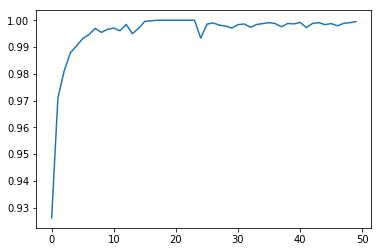

In [12]:
plt.plot(history.history['acc']);

In [13]:
history.history['acc'][-1]

0.9994920634920635

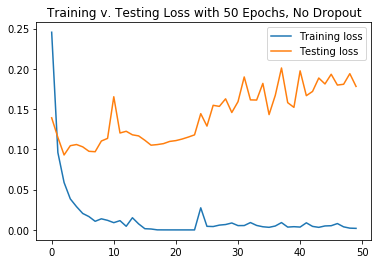

In [14]:
train_loss1 = history.history['loss']
test_loss1 = history.history['val_loss']
plt.plot(train_loss1, label='Training loss')
plt.plot(test_loss1, label='Testing loss')
plt.title('Training v. Testing Loss with 50 Epochs, No Dropout')
plt.legend();

In [15]:
print(history.history['loss'][-1])
print(history.history['val_loss'][-1])

0.0019376642813723058
0.17811376905628362


In [16]:
model = Sequential()

n_input = X_train.shape[1]
n_hidden = n_input
n_output = 10

model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(n_output, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=50, batch_size=None, verbose=1)

Train on 31500 samples, validate on 10500 samples
Epoch 1/50
31500/31500 [==============================] - 5s 144us/step - loss: 0.3126 - acc: 0.9063 - val_loss: 0.1612 - val_acc: 0.9540
Epoch 2/50
31500/31500 [==============================] - 4s 137us/step - loss: 0.1566 - acc: 0.9525 - val_loss: 0.1148 - val_acc: 0.9666
Epoch 3/50
31500/31500 [==============================] - 4s 137us/step - loss: 0.1172 - acc: 0.9637 - val_loss: 0.1094 - val_acc: 0.9665
Epoch 4/50
31500/31500 [==============================] - 4s 138us/step - loss: 0.0954 - acc: 0.9687 - val_loss: 0.0990 - val_acc: 0.9714
Epoch 5/50
31500/31500 [==============================] - 4s 138us/step - loss: 0.0812 - acc: 0.9743 - val_loss: 0.0965 - val_acc: 0.9710
Epoch 6/50
31500/31500 [==============================] - 4s 137us/step - loss: 0.0719 - acc: 0.9775 - val_loss: 0.0854 - val_acc: 0.9758
Epoch 7/50
31500/31500 [==============================] - 4s 138us/step - loss: 0.0642 - acc: 0.9790 - val_loss: 0.0879 - 

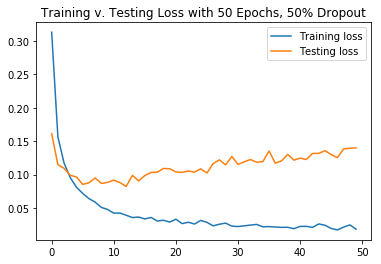

In [17]:
train_loss2 = history.history['loss']
test_loss2 = history.history['val_loss']
plt.plot(train_loss2, label='Training loss')
plt.plot(test_loss2, label='Testing loss')
plt.title('Training v. Testing Loss with 50 Epochs, 50% Dropout')
plt.legend();

In [18]:
print(history.history['loss'][-1])
print(history.history['val_loss'][-1])

0.018652386337858706
0.1399949569028495


In [19]:
model = Sequential()

n_input = X_train.shape[1]
n_hidden = n_input
n_output = 10

model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model.add(Dropout(.75))
model.add(Dense(n_output, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=50, batch_size=None, verbose=1)

Train on 31500 samples, validate on 10500 samples
Epoch 1/50
31500/31500 [==============================] - 5s 145us/step - loss: 0.4219 - acc: 0.8701 - val_loss: 0.1856 - val_acc: 0.9467
Epoch 2/50
31500/31500 [==============================] - 4s 138us/step - loss: 0.2430 - acc: 0.9241 - val_loss: 0.1461 - val_acc: 0.9561
Epoch 3/50
31500/31500 [==============================] - 4s 137us/step - loss: 0.1937 - acc: 0.9392 - val_loss: 0.1249 - val_acc: 0.9630
Epoch 4/50
31500/31500 [==============================] - 4s 138us/step - loss: 0.1800 - acc: 0.9453 - val_loss: 0.1154 - val_acc: 0.9650
Epoch 5/50
31500/31500 [==============================] - 4s 138us/step - loss: 0.1595 - acc: 0.9501 - val_loss: 0.1018 - val_acc: 0.9696
Epoch 6/50
31500/31500 [==============================] - 4s 138us/step - loss: 0.1542 - acc: 0.9520 - val_loss: 0.1024 - val_acc: 0.9704
Epoch 7/50
31500/31500 [==============================] - 4s 140us/step - loss: 0.1418 - acc: 0.9556 - val_loss: 0.0995 - 

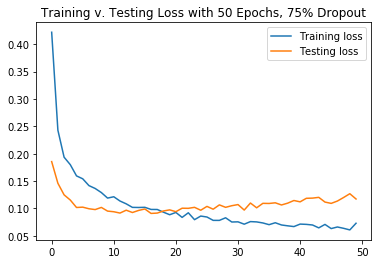

In [20]:
train_loss3 = history.history['loss']
test_loss3 = history.history['val_loss']
plt.plot(train_loss3, label='Training loss')
plt.plot(test_loss3, label='Testing loss')
plt.title('Training v. Testing Loss with 50 Epochs, 75% Dropout')
plt.legend();

In [21]:
print(history.history['loss'][-1])
print(history.history['val_loss'][-1])

0.07303808629156334
0.11732369252883308


In [22]:
model = Sequential()

n_input = X_train.shape[1]
n_hidden = n_input
n_output = 10

model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model.add(Dropout(.75))
model.add(Dense(n_output, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=15, batch_size=None, verbose=1)

Train on 31500 samples, validate on 10500 samples
Epoch 1/15
31500/31500 [==============================] - 5s 147us/step - loss: 0.4203 - acc: 0.8698 - val_loss: 0.1936 - val_acc: 0.9444
Epoch 2/15
31500/31500 [==============================] - 4s 138us/step - loss: 0.2381 - acc: 0.9277 - val_loss: 0.1549 - val_acc: 0.9530
Epoch 3/15
31500/31500 [==============================] - 4s 138us/step - loss: 0.2003 - acc: 0.9381 - val_loss: 0.1242 - val_acc: 0.9632
Epoch 4/15
31500/31500 [==============================] - 4s 139us/step - loss: 0.1755 - acc: 0.9448 - val_loss: 0.1133 - val_acc: 0.9656
Epoch 5/15
31500/31500 [==============================] - 4s 139us/step - loss: 0.1608 - acc: 0.9503 - val_loss: 0.1002 - val_acc: 0.9692
Epoch 6/15
31500/31500 [==============================] - 4s 138us/step - loss: 0.1482 - acc: 0.9552 - val_loss: 0.1028 - val_acc: 0.9695
Epoch 7/15
31500/31500 [==============================] - 4s 139us/step - loss: 0.1391 - acc: 0.9574 - val_loss: 0.0925 - 

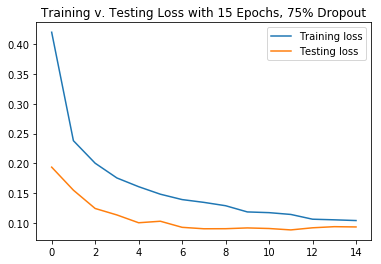

In [23]:
train_loss4 = history.history['loss']
test_loss4 = history.history['val_loss']
plt.plot(train_loss4, label='Training loss')
plt.plot(test_loss4, label='Testing loss')
plt.title('Training v. Testing Loss with 15 Epochs, 75% Dropout')
plt.legend();

In [24]:
print(history.history['loss'][-1])
print(history.history['val_loss'][-1])

0.10390833348334427
0.09315978683203104


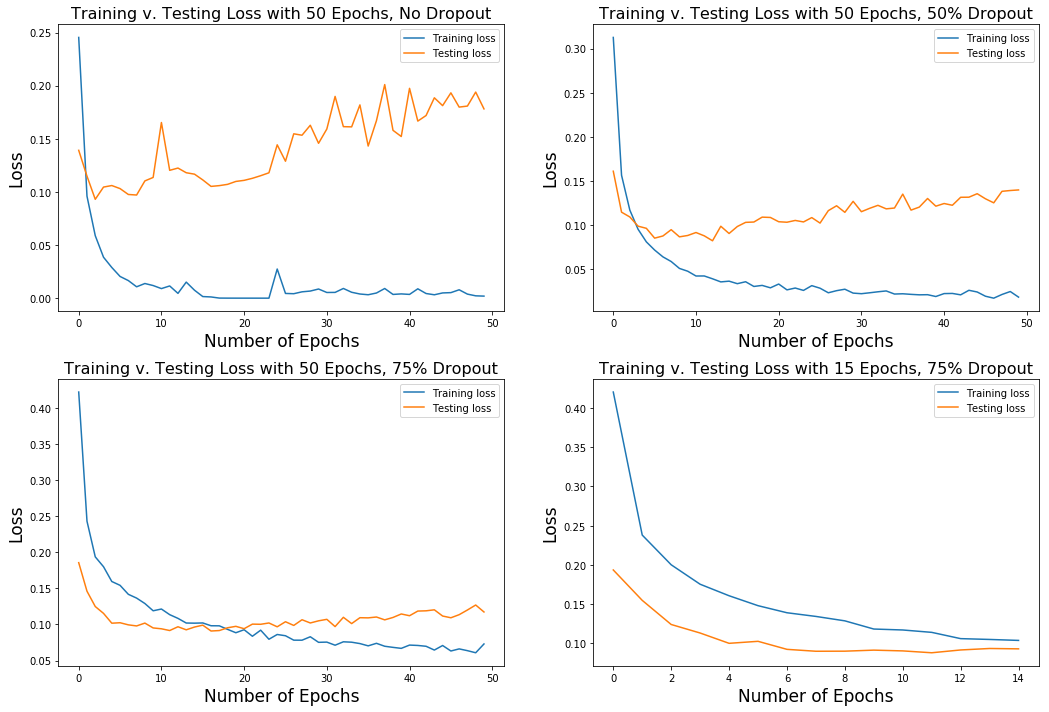

In [33]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(train_loss1, label='Training loss')
plt.plot(test_loss1, label='Testing loss')
plt.title('Training v. Testing Loss with 50 Epochs, No Dropout', fontsize=16)
plt.xlabel('Number of Epochs', fontsize=17)
plt.ylabel('Loss', fontsize=17)
plt.legend()

plt.subplot(2,2,2)
plt.plot(train_loss2, label='Training loss')
plt.plot(test_loss2, label='Testing loss')
plt.title('Training v. Testing Loss with 50 Epochs, 50% Dropout', fontsize=16)
plt.xlabel('Number of Epochs', fontsize=17)
plt.ylabel('Loss', fontsize=17)
plt.legend()

plt.subplot(2,2,3)
plt.plot(train_loss3, label='Training loss')
plt.plot(test_loss3, label='Testing loss')
plt.title('Training v. Testing Loss with 50 Epochs, 75% Dropout', fontsize=16)
plt.xlabel('Number of Epochs', fontsize=17)
plt.ylabel('Loss', fontsize=17)
plt.legend()

plt.subplot(2,2,4)
plt.plot(train_loss4, label='Training loss')
plt.plot(test_loss4, label='Testing loss')
plt.title('Training v. Testing Loss with 15 Epochs, 75% Dropout', fontsize=16)
plt.xlabel('Number of Epochs', fontsize=17)
plt.ylabel('Loss', fontsize=17)
plt.legend()

plt.tight_layout();

In [18]:
# model = Sequential()
# model.add(Dense(X_train.shape[1], input_shape=(784,), activation='relu'))
# model.add(Dropout(.5))
# model.add(Dense(y_train.shape[1], activation='softmax'))

# model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=20)

In [34]:
test = pd.read_csv('../test.csv')
test = test / 255.

In [35]:
pred = model.predict_classes(test.values)

In [36]:
test['Label'] = pred
test['ImageId'] = range(1,test.shape[0] + 1)

In [37]:
test[['ImageId', 'Label']].to_csv('submission.csv', index=False)